# Linear Regression

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('../data/weight-height.csv')

In [6]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


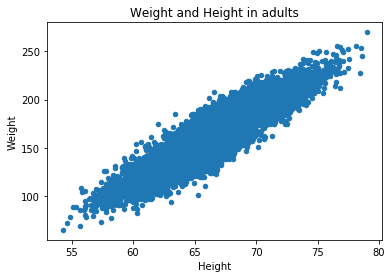

In [7]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')

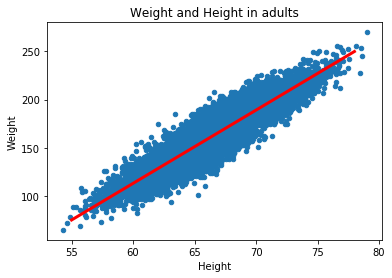

In [8]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')

# Here we're plotting the red line 'by hand' with fixed values
# We'll try to learn this line with an algorithm below
plt.plot([55, 78], [75, 250], color='red', linewidth=3)

In [9]:
def line(x, w=0, b=0):
    return x * w + b

In [10]:
x = np.linspace(55, 80, 100)

In [11]:
x

array([55.        , 55.25252525, 55.50505051, 55.75757576, 56.01010101,
       56.26262626, 56.51515152, 56.76767677, 57.02020202, 57.27272727,
       57.52525253, 57.77777778, 58.03030303, 58.28282828, 58.53535354,
       58.78787879, 59.04040404, 59.29292929, 59.54545455, 59.7979798 ,
       60.05050505, 60.3030303 , 60.55555556, 60.80808081, 61.06060606,
       61.31313131, 61.56565657, 61.81818182, 62.07070707, 62.32323232,
       62.57575758, 62.82828283, 63.08080808, 63.33333333, 63.58585859,
       63.83838384, 64.09090909, 64.34343434, 64.5959596 , 64.84848485,
       65.1010101 , 65.35353535, 65.60606061, 65.85858586, 66.11111111,
       66.36363636, 66.61616162, 66.86868687, 67.12121212, 67.37373737,
       67.62626263, 67.87878788, 68.13131313, 68.38383838, 68.63636364,
       68.88888889, 69.14141414, 69.39393939, 69.64646465, 69.8989899 ,
       70.15151515, 70.4040404 , 70.65656566, 70.90909091, 71.16161616,
       71.41414141, 71.66666667, 71.91919192, 72.17171717, 72.42

In [12]:
yhat = line(x, w=0, b=0)

In [13]:
yhat

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

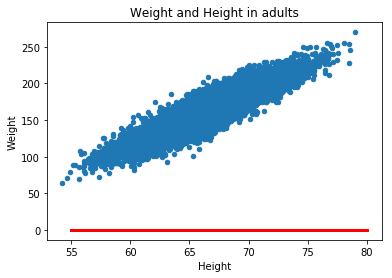

In [14]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')
plt.plot(x, yhat, color='red', linewidth=3)

### Cost Function

In [15]:
def mean_squared_error(y_true, y_pred):
    s = (y_true - y_pred)**2
    return s.mean()

In [16]:
X = df[['Height']].values
y_true = df['Weight'].values

In [17]:
y_true

array([241.89356318, 162.31047252, 212.74085556, ..., 128.47531878,
       163.85246135, 113.64910268])

In [18]:
y_pred = line(X)

In [19]:
y_pred

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [20]:
mean_squared_error(y_true, y_pred.ravel())

27093.83757456157

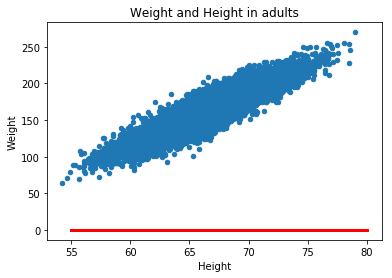

In [21]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')
plt.plot(x, yhat, color='red', linewidth=3)

Text(0.5,0,'b')

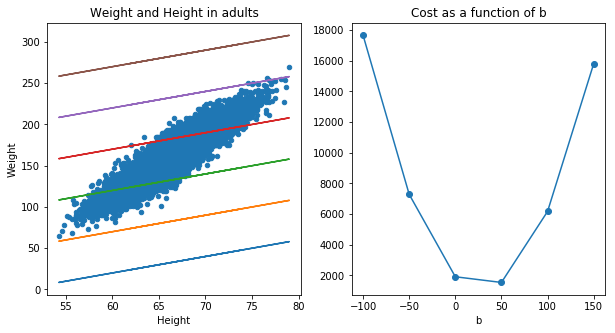

In [22]:
plt.figure(figsize=(10, 5))

# we are going to draw 2 plots in the same figure
# first plot, data and a few lines
ax1 = plt.subplot(121)
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults', ax=ax1)

# let's explore the cost function for a few values of b between -100 and +150
bbs = np.array([-100, -50, 0, 50, 100, 150])
mses = []  # we will append the values of the cost here, for each line
for b in bbs:
    y_pred = line(X, w=2, b=b)
    mse = mean_squared_error(y_true, y_pred)
    mses.append(mse)
    plt.plot(X, y_pred)

# second plot: Cost function
ax2 = plt.subplot(122)
plt.plot(bbs, mses, 'o-')
plt.title('Cost as a function of b')
plt.xlabel('b')

## Linear Regression with Keras

In [23]:
import keras

/home/nani/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [24]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

In [25]:
model = Sequential()

In [26]:
model.add(Dense(1, input_shape=(1,)))

In [27]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(Adam(lr=0.8), 'mean_squared_error')

In [29]:
model.fit(X, y_true, epochs=40)

Epoch 1/40
10000/10000 [==============================] - 0s 35us/step - loss: 650.8540
Epoch 2/40
10000/10000 [==============================] - 0s 28us/step - loss: 539.9825
Epoch 3/40
10000/10000 [==============================] - 0s 29us/step - loss: 487.8458
Epoch 4/40
10000/10000 [==============================] - 0s 28us/step - loss: 426.5316
Epoch 5/40
10000/10000 [==============================] - 0s 29us/step - loss: 385.7743
Epoch 6/40
10000/10000 [==============================] - 0s 29us/step - loss: 355.2762
Epoch 7/40
10000/10000 [==============================] - 0s 29us/step - loss: 302.6603
Epoch 8/40
10000/10000 [==============================] - 0s 30us/step - loss: 281.1628
Epoch 9/40
10000/10000 [==============================] - 0s 29us/step - loss: 256.4664
Epoch 10/40
10000/10000 [==============================] - 0s 28us/step - loss: 246.9966
Epoch 11/40
10000/10000 [==============================] - 0s 29us/step - loss: 232.0768
Epoch 12/40
10000/10000 [=====

In [30]:
y_pred = model.predict(X)

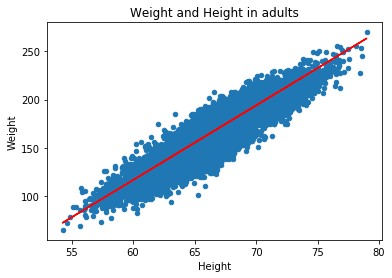

In [31]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')
plt.plot(X, y_pred, color='red')

In [32]:
W, B = model.get_weights()

In [33]:
W

array([[7.748578]], dtype=float32)

In [34]:
B

array([-348.44562], dtype=float32)

## Evaluating Model Performance

In [35]:
from sklearn.metrics import r2_score

In [36]:
print("The R2 score is {:0.3f}".format(r2_score(y_true, y_pred)))

The R2 score is 0.837


### Train Test Split

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y_true,
                                                    test_size=0.2)

In [39]:
len(X_train)

8000

In [40]:
len(X_test)

2000

In [48]:
W[0, 0] = 0.0
B[0] = 0.0
model.set_weights((W, B))

In [49]:
model.fit(X_train, y_train, epochs=50, verbose=0)

In [50]:
y_train_pred = model.predict(X_train).ravel()
y_test_pred = model.predict(X_test).ravel()

In [51]:
from sklearn.metrics import mean_squared_error as mse

In [52]:
print("The Mean Squared Error on the Train set is:\t{:0.1f}".format(mse(y_train, y_train_pred)))
print("The Mean Squared Error on the Test set is:\t{:0.1f}".format(mse(y_test, y_test_pred)))

The Mean Squared Error on the Train set is:	216.1
The Mean Squared Error on the Test set is:	224.0


In [53]:
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.789
The R2 score on the Test set is:	0.790


# Classification

In [54]:
df = pd.read_csv('../data/user_visit_duration.csv')

In [55]:
df.head()

,Time (min),Buy
0,2.000000,0
1,0.683333,0
2,3.216667,1
3,0.900000,0
4,1.533333,1


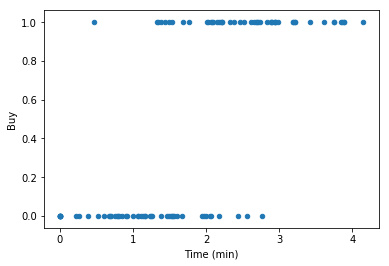

In [56]:
df.plot(kind='scatter', x='Time (min)', y='Buy')

In [57]:
model = Sequential()
model.add(Dense(1, input_shape=(1,), activation='sigmoid'))

In [58]:
model.compile(SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])

In [59]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [60]:
X = df[['Time (min)']].values
y = df['Buy'].values

model.fit(X, y, epochs=25)

Epoch 1/25
100/100 [==============================] - 0s 782us/step - loss: 0.7879 - acc: 0.4400
Epoch 2/25
100/100 [==============================] - 0s 115us/step - loss: 0.6282 - acc: 0.5700
Epoch 3/25
100/100 [==============================] - 0s 83us/step - loss: 0.5899 - acc: 0.6600
Epoch 4/25
100/100 [==============================] - 0s 79us/step - loss: 0.5731 - acc: 0.8100
Epoch 5/25
100/100 [==============================] - 0s 103us/step - loss: 0.5340 - acc: 0.7700
Epoch 6/25
100/100 [==============================] - 0s 86us/step - loss: 0.5182 - acc: 0.8000
Epoch 7/25
100/100 [==============================] - 0s 96us/step - loss: 0.5158 - acc: 0.7800
Epoch 8/25
100/100 [==============================] - 0s 59us/step - loss: 0.5093 - acc: 0.7400
Epoch 9/25
100/100 [==============================] - 0s 93us/step - loss: 0.4800 - acc: 0.8000
Epoch 10/25
100/100 [==============================] - 0s 113us/step - loss: 0.4758 - acc: 0.7800
Epoch 11/25
100/100 [==============

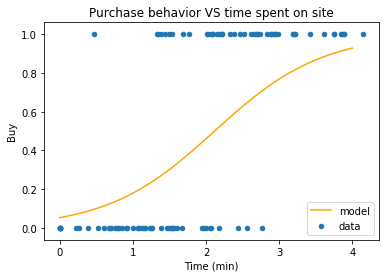

In [61]:
ax = df.plot(kind='scatter', x='Time (min)', y='Buy',
             title='Purchase behavior VS time spent on site')

temp = np.linspace(0, 4)
ax.plot(temp, model.predict(temp), color='orange')
plt.legend(['model', 'data'])

In [62]:
temp_class = model.predict(temp) > 0.5

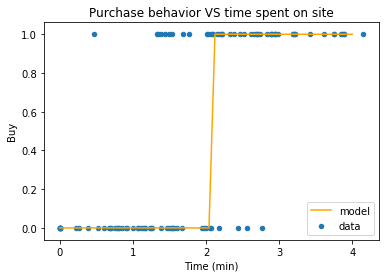

In [63]:
ax = df.plot(kind='scatter', x='Time (min)', y='Buy',
             title='Purchase behavior VS time spent on site')

temp = np.linspace(0, 4)
ax.plot(temp, temp_class, color='orange')
plt.legend(['model', 'data'])

In [64]:
y_pred = model.predict(X)
y_class_pred = y_pred > 0.5

In [65]:
from sklearn.metrics import accuracy_score

In [66]:
print("The accuracy score is {:0.3f}".format(accuracy_score(y, y_class_pred)))

The accuracy score is 0.820


### Train/Test split


In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [68]:
params = model.get_weights()
params = [np.zeros(w.shape) for w in params]
model.set_weights(params)

In [69]:
print("The accuracy score is {:0.3f}".format(accuracy_score(y, model.predict(X) > 0.5)))

The accuracy score is 0.500


In [70]:
model.fit(X_train, y_train, epochs=25, verbose=0)

In [71]:
print("The train accuracy score is {:0.3f}".format(accuracy_score(y_train, model.predict(X_train) > 0.5)))
print("The test accuracy score is {:0.3f}".format(accuracy_score(y_test, model.predict(X_test) > 0.5)))

The train accuracy score is 0.850
The test accuracy score is 0.700


## Cross Validation

In [72]:
from keras.wrappers.scikit_learn import KerasClassifier

In [73]:
def build_logistic_regression_model():
    model = Sequential()
    model.add(Dense(1, input_shape=(1,), activation='sigmoid'))
    model.compile(SGD(lr=0.5),
                  'binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [74]:
model = KerasClassifier(build_fn=build_logistic_regression_model,
                        epochs=25,
                        verbose=0)

In [75]:
from sklearn.model_selection import cross_val_score, KFold

In [76]:
cv = KFold(3, shuffle=True)

In [77]:
scores = cross_val_score(model, X, y, cv=cv)

In [78]:
scores

array([0.73529412, 0.78787879, 0.81818182])

In [79]:
print("The cross validation accuracy is {:0.4f} ± {:0.4f}".format(scores.mean(), scores.std()))

The cross validation accuracy is 0.7805 ± 0.0342


## Confusion Matrix

In [80]:
from sklearn.metrics import confusion_matrix

In [81]:
confusion_matrix(y, y_class_pred)

array([[46,  4],
       [14, 36]])

In [82]:
def pretty_confusion_matrix(y_true, y_pred, labels=["False", "True"]):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ['Predicted '+ l for l in labels]
    df = pd.DataFrame(cm, index=labels, columns=pred_labels)
    return df

In [83]:
pretty_confusion_matrix(y, y_class_pred, ['Not Buy', 'Buy'])

,Predicted Not Buy,Predicted Buy
Not Buy,46,4
Buy,14,36


In [84]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [85]:
print("Precision:\t{:0.3f}".format(precision_score(y, y_class_pred)))
print("Recall:  \t{:0.3f}".format(recall_score(y, y_class_pred)))
print("F1 Score:\t{:0.3f}".format(f1_score(y, y_class_pred)))

Precision:	0.900
Recall:  	0.720
F1 Score:	0.800


In [86]:
from sklearn.metrics import classification_report

In [87]:
print(classification_report(y, y_class_pred))

             precision    recall  f1-score   support

          0       0.77      0.92      0.84        50
          1       0.90      0.72      0.80        50

avg / total       0.83      0.82      0.82       100



## Feature Preprocessing

### Categorical Features

In [88]:
df = pd.read_csv('../data/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [89]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [90]:
pd.get_dummies(df['Gender'], prefix='Gender').head()

,Gender_Female,Gender_Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


## Feature Transformations

#### 1) Rescale with fixed factor

In [91]:
df['Height (feet)'] = df['Height']/12.0
df['Weight (100 lbs)'] = df['Weight']/100.0

In [92]:
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs)
count,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61
std,3.85,32.11,0.32,0.32
min,54.26,64.70,4.52,0.65
25%,63.51,135.82,5.29,1.36
50%,66.32,161.21,5.53,1.61
75%,69.17,187.17,5.76,1.87
max,79.00,269.99,6.58,2.70


#### MinMax normalization

In [93]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
df['Weight_mms'] = mms.fit_transform(df[['Weight']])
df['Height_mms'] = mms.fit_transform(df[['Height']])
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs),Weight_mms,Height_mms
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61,0.47,0.49
std,3.85,32.11,0.32,0.32,0.16,0.16
min,54.26,64.70,4.52,0.65,0.00,0.00
25%,63.51,135.82,5.29,1.36,0.35,0.37
50%,66.32,161.21,5.53,1.61,0.47,0.49
75%,69.17,187.17,5.76,1.87,0.60,0.60
max,79.00,269.99,6.58,2.70,1.00,1.00


#### 3) Standard normalization

In [94]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df['Weight_ss'] = ss.fit_transform(df[['Weight']])
df['Height_ss'] = ss.fit_transform(df[['Height']])
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs),Weight_mms,Height_mms,Weight_ss,Height_ss
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61,0.47,0.49,-0.00,-0.00
std,3.85,32.11,0.32,0.32,0.16,0.16,1.00,1.00
min,54.26,64.70,4.52,0.65,0.00,0.00,-3.01,-3.15
25%,63.51,135.82,5.29,1.36,0.35,0.37,-0.80,-0.74
50%,66.32,161.21,5.53,1.61,0.47,0.49,-0.01,-0.01
75%,69.17,187.17,5.76,1.87,0.60,0.60,0.80,0.73
max,79.00,269.99,6.58,2.70,1.00,1.00,3.38,3.28


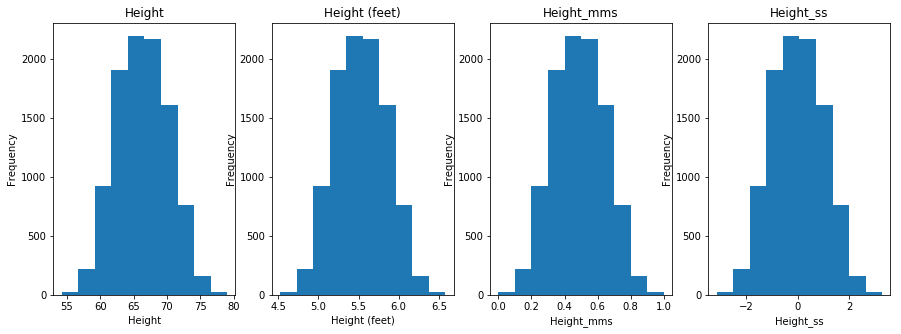

In [95]:
plt.figure(figsize=(15, 5))

for i, feature in enumerate(['Height', 'Height (feet)', 'Height_mms', 'Height_ss']):
    plt.subplot(1, 4, i+1)
    df[feature].plot(kind='hist', title=feature)
    plt.xlabel(feature)